In [31]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.vector_ar.var_model import VAR

In [32]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


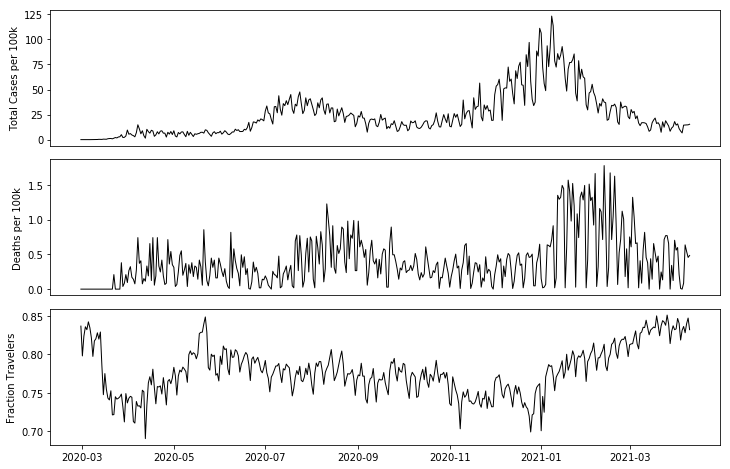

In [33]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates,state_X["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates,state_X["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates,state_y,color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

In [34]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.016636362873794507,
 2: 0.01566882919432316,
 3: 0.1181464987413141,
 4: 0.013477841584417337,
 5: 0.004781290147764799,
 6: 2.6938902230341052e-11,
 7: 1.7618716598486448e-08,
 8: 2.5082650146553474e-06,
 9: 6.935302587021434e-06,
 10: 1.9357020547096794e-05,
 11: 2.7207725163854524e-05,
 12: 5.4777017637252994e-05,
 13: 1.2441897884758924e-05,
 14: 4.888257278204077e-06,
 15: 9.416816320311779e-05}

In [35]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["deaths"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.02212558191019333,
 2: 0.04787417960018308,
 3: 0.2516715081426325,
 4: 0.3791409398029668,
 5: 0.08136250518215676,
 6: 0.0004424545633249673,
 7: 1.526543545899632e-06,
 8: 0.009437192977322525,
 9: 0.041848631061507865,
 10: 0.06847143832288843,
 11: 0.10173117683076763,
 12: 0.12865530728908098,
 13: 0.024223276533779505,
 14: 0.028333611293043234,
 15: 0.16589951089756425}

In [51]:
train_frac = 0.85

In [52]:
vector_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"],state_X["deaths"]],axis=1)
vector_data_train = vector_data.iloc[:int(train_frac*len(vector_data)),:]
vector_data_test = vector_data.iloc[int(train_frac*len(vector_data)):,:]
vector_data_train

,Population Not Staying at Home,total_cases,deaths
0,0.836725,0.019012,0.000000
1,0.797960,0.000000,0.000000
2,0.823699,0.009506,0.000000
3,0.835889,0.019012,0.000000
4,0.832086,0.019012,0.000000
...,...,...,...
340,0.801127,47.863605,1.273828
341,0.804939,55.259412,1.321359
342,0.814723,47.046074,0.922099
343,0.796542,43.167554,1.663581


In [53]:
y_stationarity = adfuller(vector_data_train["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_train["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_train["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -3.176242854978842
p-value: 0.021401681430697303

Total Cases per 100k
------------------------------
ADF Stat: -1.9420092297488372
p-value: 0.31256387233984007

Deaths per 100k
------------------------------
ADF Stat: -1.0241894378706191
p-value: 0.7443398464554749


In [54]:
vector_data_diff = vector_data_train.diff().dropna()

In [55]:
y_stationarity = adfuller(vector_data_diff["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_diff["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_diff["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -4.892011155085184
p-value: 3.614480595725741e-05

Total Cases per 100k
------------------------------
ADF Stat: -3.170396688229487
p-value: 0.02176346413102701

Deaths per 100k
------------------------------
ADF Stat: -6.845913939680307
p-value: 1.7430721690281254e-09


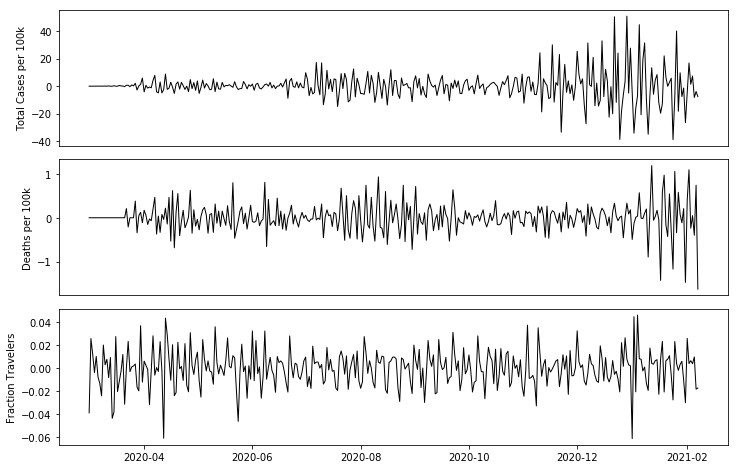

In [56]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["Population Not Staying at Home"],color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


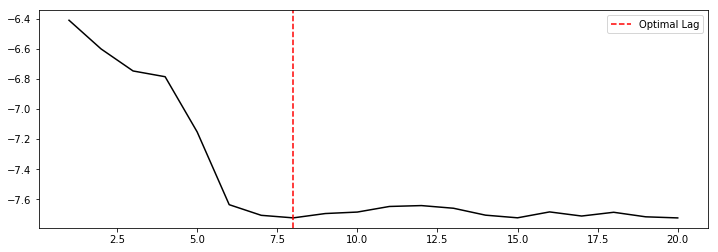

In [57]:
# model = VAR(vector_data_diff,dates=dates[1:])
# aic_vals = []
# best_lag = None
# lag_range = np.arange(1,21,1)
# for i in lag_range:
#     result = model.fit(i)
#     aic_vals.append(result.aic)
#     if (best_lag == None) and (i > 1) and (aic_vals[-1]-aic_vals[-2] > 0):
#         best_lag = i-1

# fig = plt.figure(figsize=(12,4))

# plt.plot(lag_range, aic_vals, color='k')
# plt.axvline(best_lag,color='red',linestyle='--',label="Optimal Lag")

# plt.legend()
# plt.show()

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


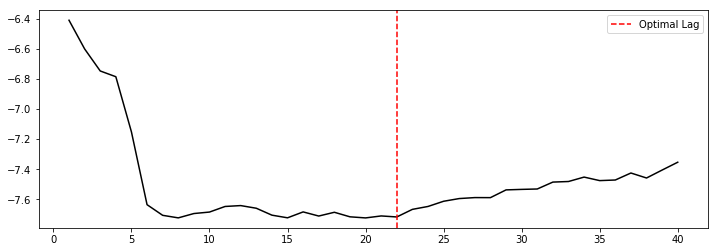

In [72]:
model = VAR(vector_data_diff)
mse_vals = []
best_mse = 1e6
aic_vals = []
lag_range = np.arange(1,41,1)
best_lag = 22
best_lag_aic = None

for i in lag_range:
    result = model.fit(i)
    
    aic_vals.append(result.aic)
    
    start_index = i
    input_data = vector_data_diff.values[-start_index:]

    forecast = result.forecast(y=input_data, steps=len(vector_data_test))
    forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)
    forecast_copy = forecast.copy()

    cols = vector_data_train.columns
    for col in cols:        
        forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
    proper_forecast = forecast_copy.iloc[:,3:]

    mse = ((proper_forecast["Population Not Staying at Home_forecast"] - vector_data_test["Population Not Staying at Home"])**2).mean()
    mse_vals.append(mse)
    
#     if (i > 1) and (best_mse > mse):
#         best_mse = mse
#         best_lag = i
        
#     if (best_lag == None) and (i > 1) and (aic_vals[-1]-aic_vals[-2] > 0):
#         best_lag = i-1

# fig = plt.figure(figsize=(12,4))

# plt.plot(lag_range, mse_vals, color='k')
# plt.axvline(best_lag,color='red',linestyle='--',label="Optimal Lag")

# plt.legend()
# plt.show()

fig = plt.figure(figsize=(12,4))

plt.plot(lag_range, aic_vals, color='k')
plt.axvline(best_lag,color='red',linestyle='--',label="Optimal Lag")

plt.legend()
plt.show()

In [73]:
fit_model = VAR(vector_data_diff,dates=dates[1:int(train_frac*len(vector_data))]).fit(best_lag)
fit_model.summary()

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Apr, 2021
Time:                     09:17:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -5.36069
Nobs:                     322.000    HQIC:                  -6.77620
Log likelihood:           72.7189    FPE:                0.000453573
AIC:                     -7.71685    Det(Omega_mle):     0.000257256
--------------------------------------------------------------------
Results for equation Population Not Staying at Home
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.000559         0.000723            0.774           0.439
L1.Population Not Staying at Home         -0.382394  

In [74]:
durbin_watson(fit_model.resid)

array([2.00308472, 2.01989824, 2.00215543])

In [75]:
lag_num = fit_model.k_ar
input_data = vector_data_diff.values[-lag_num:]

In [76]:
forecast = fit_model.forecast(y=input_data, steps=len(vector_data_test))
forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)

In [77]:
forecast_copy = forecast.copy()
cols = vector_data_train.columns
for col in cols:        
    forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
proper_forecast = forecast_copy.iloc[:,3:]
proper_forecast

,Population Not Staying at Home_forecast,total_cases_forecast,deaths_forecast
345,0.805351,21.966503,0.319598
346,0.798346,42.652290,1.248143
347,0.796001,38.839094,1.017692
348,0.811405,47.520513,1.019187
349,0.818992,41.801727,1.177106
...,...,...,...
402,0.818511,34.106228,0.781193
403,0.821726,43.552481,1.033606
404,0.823858,44.444175,1.011551
405,0.830773,44.427640,0.932340


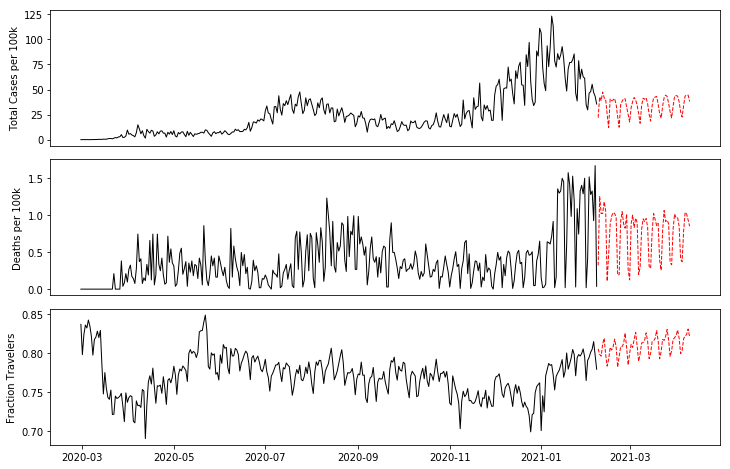

In [78]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

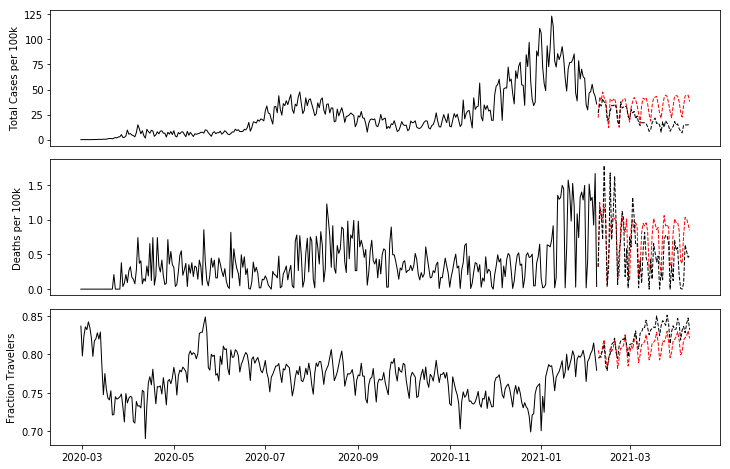

In [81]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["total_cases"],color='k',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["deaths"],color='k',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["Population Not Staying at Home"],color='k',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

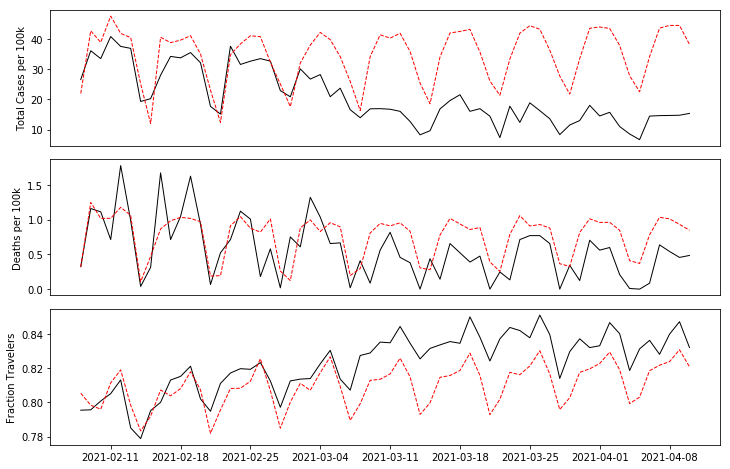

In [79]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()